In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from ipywidgets import interact, widgets
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import ScalarFormatter


wine_production_path = "Resources/wine-production.csv"
global_temps_path = "Resources/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"

wine_production_data = pd.read_csv(wine_production_path)
global_temps_data = pd.read_csv(global_temps_path)


In [2]:
#Cleaning up GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv
unique_countries_wine = wine_production_data['Entity'].unique()

#clean up global_temps_data and return only relevant years
global_temps_data['dt'] = pd.to_datetime(global_temps_data['dt'])
global_temps_data_1961 = global_temps_data[global_temps_data['dt']>='1961-01-01']
#global_temps_data_1961

global_temps_data_1961['Year'] = ""
global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year

global_temps_data_1961['AverageTemperature'] = (global_temps_data_1961['AverageTemperature'] * 9/5) + 32

# global_temps_grouped_mean = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].mean()
# global_temps_grouped_median = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].median()
# global_temps_grouped_max = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].max()
# global_temps_grouped_min = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].min()
# global_temps_grouped_std = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].std()


# global_temps = pd.DataFrame({
#     "Average Temperature (F°)" : global_temps_grouped_mean,
#     "Minimum Temperature (F°)" : global_temps_grouped_min,
#     "Maximum Temperature (F°)" : global_temps_grouped_max,
#     "Median Temperature (F°)" : global_temps_grouped_median,
#     "Standard Deviation" : global_temps_grouped_std
# })

global_groups = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature']

cols = ["Average Temperature (F°)", 
        "Minimum Temperature (F°)", 
        "Maximum Temperature (F°)", 
        "Median Temperature (F°)", 
        "Standard Deviation"]

vals = [global_groups.mean(),
       global_groups.median(),
       global_groups.max(),
       global_groups.min(),
       global_groups.std()]

global_temps = pd.DataFrame(dict(zip(cols, vals)))

global_temps.to_csv("Resources/global_temps.csv", index_label="Country")

global_temps.head()


#merged_data = pd.merge(wine_production_data, global_temps_data, on="Country", how="inner")


#merge_data = pd.merge(wine_production_data, global_temps_data, how="inner", left_on="Entity", right_on="Country")
#merge_data


#unique_countries_wine
#create new data frame with global temp. Group by country, year and calculate the mean, max, min temps. left_on=year. right_on = country
#1. group by country 
#2. group by year

#inner join will filter out rows


/var/folders/q4/pxfstmr91k3f4ljkh171th7m0000gp/T/ipykernel_6507/3943574621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = ""
/var/folders/q4/pxfstmr91k3f4ljkh171th7m0000gp/T/ipykernel_6507/3943574621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year
/var/folders/q4/pxfstmr91k3f4ljkh171th7m0000gp/T/ipykernel_6507/3943574621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Average Temperature (F°)  Minimum Temperature (F°)  \
Country     Year                                                       
Afghanistan 1961                  57.31685                   54.9734   
            1962                  56.78360                   56.7563   
            1963                  59.06015                   60.2582   
            1964                  55.55285                   54.9059   
            1965                  57.38330                   58.1990   

                  Maximum Temperature (F°)  Median Temperature (F°)  \
Country     Year                                                      
Afghanistan 1961                   81.2534                  34.6676   
            1962                   80.5298                  33.1088   
            1963                   81.0428                  36.5000   
            1964                   79.6460                  24.3428   
            1965                   80.1968                  35.7746   

                  Standard Deviation  
Country     Year                      
Afghanistan 1961           17.431491  
            1962           16.458718  
            1963           15.942641  
            1964           18.722815  
            1965           16.117239

In [3]:
#Cleaning up wine production data
wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] = (wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] * 0.90718474).round(2)

In [4]:
#Merging wine-production.csv with global_temps.csv
merge_data = pd.merge(wine_production_data, global_temps, how="inner", left_on=["Entity",'Year'], right_on=["Country", 'Year'])

merge_data.rename(columns={'': 'Sheet Index', 'Entity': 'Country','Year': 'Year', 'Wine | 00000564 || Production | 005510 || tonnes': 'Wine Production (tons)'}, inplace=True)
merge_data
merge_data.to_csv("Resources/merge_data.csv", index_label="Country")


In [5]:
#Seperating data by regions and country
country_data_df = merge_data.dropna(subset=['Code'])
country_data_df.to_csv("Resources/country_data_df.csv", index_label="Country")
country_data_df



,Country,Code,Year,Wine Production (tons),Average Temperature (F°),Minimum Temperature (F°),Maximum Temperature (F°),Median Temperature (F°),Standard Deviation
53,Albania,ALB,1961,3229.58,55.97015,57.4232,71.9996,38.4458,12.240442
54,Albania,ALB,1962,4145.83,55.52375,55.6619,75.4592,37.1516,13.481548
55,Albania,ALB,1963,2078.36,55.55450,54.8222,73.7420,35.0384,13.397239
56,Albania,ALB,1964,2784.15,54.52760,55.0877,70.7504,33.8558,12.662470
57,Albania,ALB,1965,3643.25,54.28115,52.7630,73.1498,33.2618,12.910885
...,...,...,...,...,...,...,...,...,...
2976,Zimbabwe,ZWE,2009,1587.57,70.47905,72.4748,76.5158,59.4212,5.551294
2977,Zimbabwe,ZWE,2010,1587.57,71.57525,73.9472,78.6974,61.4786,6.000668
2978,Zimbabwe,ZWE,2011,1587.57,70.88435,73.2956,77.9378,60.4454,5.843389
2979,Zimbabwe,ZWE,2012,1587.57,70.73840,73.4819,76.2908,60.8864,5.532541


In [6]:
def plot_wine_production(country):
    """ Plots the wine production over years for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]
        
        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(data['Year'], data['Wine Production (tons)'], marker='o')
        plt.title(f'Wine Production Over Time in {country}')
        plt.xlabel('Year')
        plt.ylabel('Wine Production (tons)')
        plt.grid(True)
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

# Link the dropdown to the plotting function
widgets.interactive(plot_wine_production, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [7]:


def plot_country_data(country):
    """ Plots wine production and average temperature over years for a selected country. """
    if country:
        # Filter data for the selected country
        country_data = country_data_df[country_data_df['Country'] == country]

        # Creating figure and first y-axis for wine production
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.plot(country_data['Year'], country_data['Wine Production (tons)'], color='tab:blue')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Wine Production (tons)', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Creating second y-axis for temperature
        ax2 = ax1.twinx()
        ax2.plot(country_data['Year'], country_data['Average Temperature (F°)'], color='tab:red', linestyle='--')
        ax2.set_ylabel('Average Temperature (F°)', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        # Adding title and showing the plot
        plt.title(f'Wine Production and Average Temperature in {country} Over Time')
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

# Link the dropdown to the plotting function
widgets.interactive(plot_country_data, country=country_dropdown)

#Greece, Ethiopia, 

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [40]:

def categorize_by_decade(year):
    """Assigns a decade group label based on the year."""
    if year < 1970:
        return "1970 and before"
    elif year < 1980:
        return "1970-1979"
    elif year < 1990:
        return "1980-1989"
    elif year < 2000:
        return "1990-1999"
    elif year < 2010:
        return "2000-2001"
    elif year < 2020:
        return "2011-2019"
    # Add additional conditions for other decades up to 2020
    else:
        return "2020 and after"

country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)

def plot_scatter_and_regression(country):
    """ Plots a scatterplot with regression line for temperature vs. wine production for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]

        # Scatterplot
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, hue='Decade Group', palette='Spectral_r')

        # Regression line
        slope, intercept, r_value, p_value, std_err = st.linregress(data['Average Temperature (F°)'], data['Wine Production (tons)'])
        sns.regplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}')

        # Adding labels and title
        plt.xlabel('Average Temperature (F°)')
        plt.ylabel('Wine Production (tons)')
        plt.title(f'Temperature vs. Wine Production in {country}\n'
                  f"r-value = {round(r_value,4)}\np-value = {round(p_value,4)}")
        plt.legend()
        plt.annotate(f'r-value = {r_value}',(10000,58),fontsize=15,color="red")
        plt.show()
        

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

# Link the dropdown to the plotting function
widgets.interactive(plot_scatter_and_regression, country=country_dropdown)


/var/folders/q4/pxfstmr91k3f4ljkh171th7m0000gp/T/ipykernel_6507/1736854743.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)


interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

The r-value is: -0.10648044360881308
The p-value is: 3.6307807728405286e-08


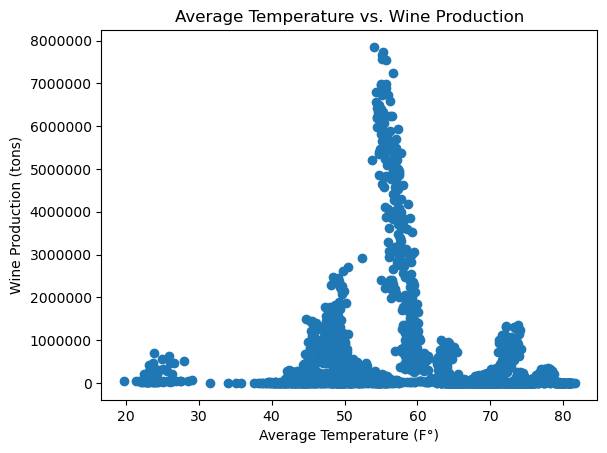

In [36]:
x = country_data_df['Average Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Average Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Average Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.12595200249204536
The p-value is: 6.909953886861913e-11


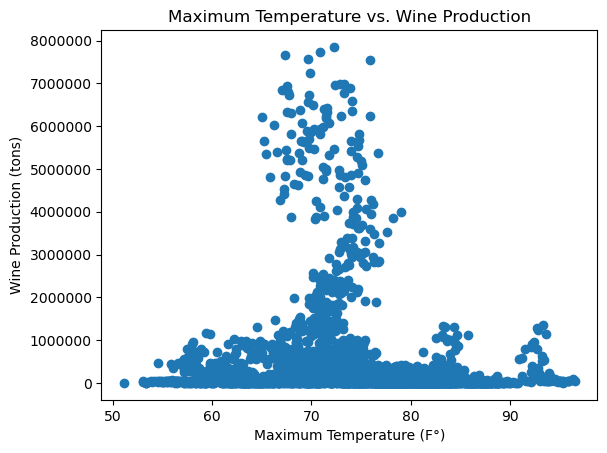

In [37]:
x = country_data_df['Maximum Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Maximum Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Maximum Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.12907735718286142
The p-value is: 2.2966644884941372e-11


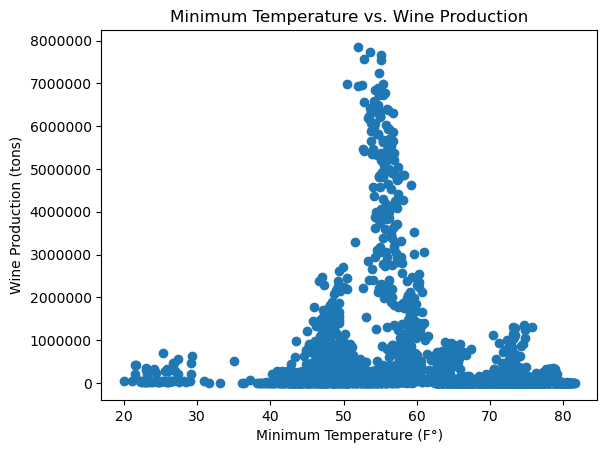

In [38]:
x = country_data_df['Minimum Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Minimum Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Minimum Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.05664611264830771
The p-value is: 0.003453910366474039


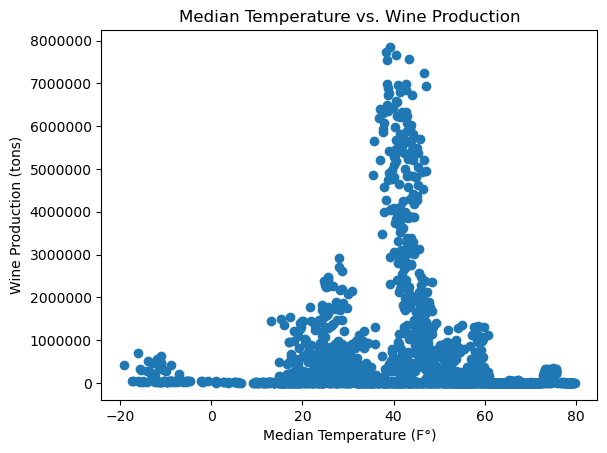

In [39]:
x = country_data_df['Median Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Median Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Median Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()